In [2]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
# define the model
model = Sequential()
model.add(Dense(10, input_shape=(8,)))
model.add(Dense(1))

In [3]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
# define the model
model = Sequential()
model.add(Dense(100, input_shape=(10,)))
model.add(Dense(80))
model.add(Dense(30))
model.add(Dense(10))
model.add(Dense(5))
model.add(Dense(1))

In [4]:
from tensorflow.keras import Model
from tensorflow.keras import Input
from tensorflow.keras.layers import Dense
# define the layers
x_in = Input(shape=(8,))
x = Dense(10)(x_in)
x_out = Dense(1)(x)
# define the model
model = Model(inputs=x_in, outputs=x_out)

In [5]:
from numpy import argmax
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [6]:
path = 'https://raw.githubusercontent.com/achmatim/data-mining/main/Dataset/iris.csv'
df = read_csv(path)

df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Label
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [7]:
# split data 
X, y = df.values[:, :-1], df.values[:, -1]
# ubah tipe data menjadi float32
X = X.astype('float32')

# encode string menjadi integer
y = LabelEncoder().fit_transform(y)

# split dataset menjadi 80% data training dan 20% data testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# memperoleh banyaknya jumlah fitur pada input
n_features = X_train.shape[1]

(120, 4) (30, 4) (120,) (30,)


In [8]:
# TODO 1 : Ketik kode di atas pada cell ini
# define the model
model = Sequential()
model.add(Dense(10, activation ='relu', input_shape=(n_features,)))
model.add(Dense(10, activation ='relu',))
model.add(Dense(3, activation ='sigmoid'))

In [9]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [10]:
model.fit(X_train, y_train, epochs=150, batch_size=32, verbose=0)

In [11]:
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print('Tes Accuracy: %.3f' % acc)

Tes Accuracy: 0.967


In [12]:
row = [5.1, 3.5, 1.4, 0.2]
yhat = model.predict([row])
print('Predicted %s (class=%d)' % (yhat, argmax(yhat)))

Predicted [[0.99497473 0.7971073  0.00292188]] (class=0)


Visual Deep Learning Model

In [13]:
# Contoh 
from tensorflow.keras.layers import Dense
# define model1
model1 = Sequential()
model1.add(Dense(100, input_shape=(10,)))
model1.add(Dense(80))
model1.add(Dense(30))
model1.add(Dense(10))
model1.add(Dense(5))
model1.add(Dense(1))

In [14]:
model1.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 100)               1100      
_________________________________________________________________
dense_14 (Dense)             (None, 80)                8080      
_________________________________________________________________
dense_15 (Dense)             (None, 30)                2430      
_________________________________________________________________
dense_16 (Dense)             (None, 10)                310       
_________________________________________________________________
dense_17 (Dense)             (None, 5)                 55        
_________________________________________________________________
dense_18 (Dense)             (None, 1)                 6         
Total params: 11,981
Trainable params: 11,981
Non-trainable params: 0
__________________________________________________

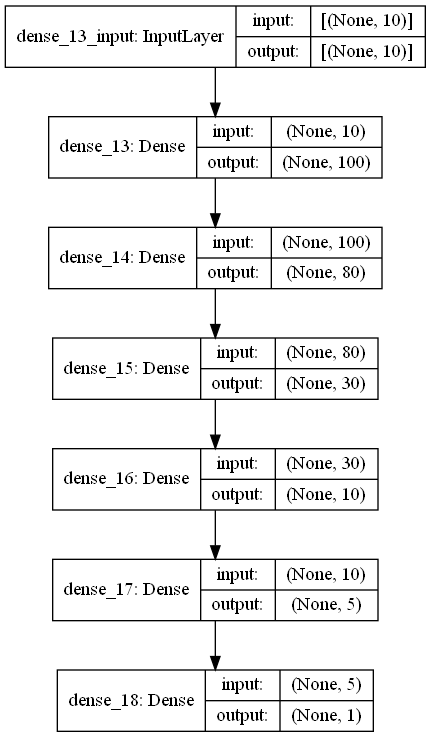

In [15]:
# Contoh model architecture plot
from tensorflow.keras.utils import plot_model
# summarize model 1
plot_model(model1, 'model_1_summary.png', show_shapes=True)

In [16]:
# Contoh plotting learning curves
# define model 2 
model2 = Sequential()
model2.add(Dense(10, activation='relu', input_shape=(n_features,)))
model2.add(Dense(8, activation='relu', ))
model2.add(Dense(3, activation='softmax'))

# compile model 2
model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# fit model 2
history = model2.fit(X_train, y_train, epochs=150, batch_size=32, verbose=0,validation_split=0.3)

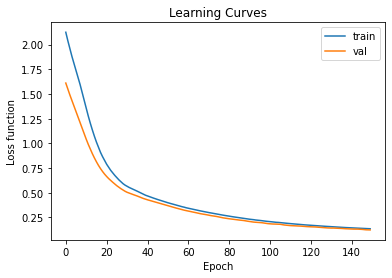

In [17]:
from matplotlib import pyplot
# plot learning curves
pyplot.title('Learning Curves')
pyplot.xlabel('Epoch')
pyplot.ylabel('Loss function')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='val')
pyplot.legend()
pyplot.show()

In [18]:
model2.save('model_2.h5')

In [20]:
from tensorflow.keras.models import load_model
# load model 2 untuk digunakan lagi dari file
model3 = load_model('model_2.h5')

loss, acc = model3.evaluate(X_test, y_test, verbose=0)
print('Test Accuracy_model_3: %.3f' % acc)

# Buat prediksi
row = [0.1,0.5,7.4,7.2]
yhat = model3.predict([row])
print('Predicted: %s (class=%d)' % (yhat, argmax(yhat)))

Test Accuracy_model_3: 0.967
Predicted: [[1.1749293e-05 5.4460256e-03 9.9454224e-01]] (class=2)


In [21]:
from tensorflow.keras.layers import Dropout

model = Sequential()
model.add(Dense(100, input_shape=(10,)))
model.add(Dropout(0.5))
model.add(Dense(80))
model.add(Dropout(0.5))
model.add(Dense(30))
model.add(Dropout(0.5))
model.add(Dense(10))
model.add(Dropout(0.5))
model.add(Dense(5))
model.add(Dense(1))

In [22]:
from tensorflow.keras.layers import BatchNormalization

model = Sequential()
model.add(Dense(100, input_shape=(10,)))
model.add(Dense(80))
model.add(BatchNormalization())
model.add(Dense(30))
model.add(BatchNormalization())
model.add(Dense(10))
model.add(BatchNormalization())
model.add(Dense(5))
model.add(Dense(1))